In [ ]:
class LinearRegressionModel:
    def __init__(self):
        self.m = None   # slope
        self.b = None   # intercept

    # Fit the model to the training data
    def fit(self, X_train, y_train):

        numerator = 0
        denominator = 0

        for i in range(X_train.shape[0]):
            numerator += (X_train[i] - X_train.mean()) * (y_train[i] - y_train.mean())
            denominator += ((X_train[i] - X_train.mean()) ** 2)
        
        self.m = numerator / denominator
        self.b = y_train.mean() - self.m * X_train.mean()

        print(f"Fitted model with slope: {self.m}, intercept: {self.b}")

    # Predict using the fitted model
    def predict(self, X_test):
        return self.m * X_test + self.b       

In [43]:
import numpy as np
import pandas as pd

df = pd.read_csv('placement.csv')
df.head()

,cgpa,package
0,6.89,3.26
1,5.12,1.98
2,7.82,3.25
3,7.42,3.67
4,6.94,3.57


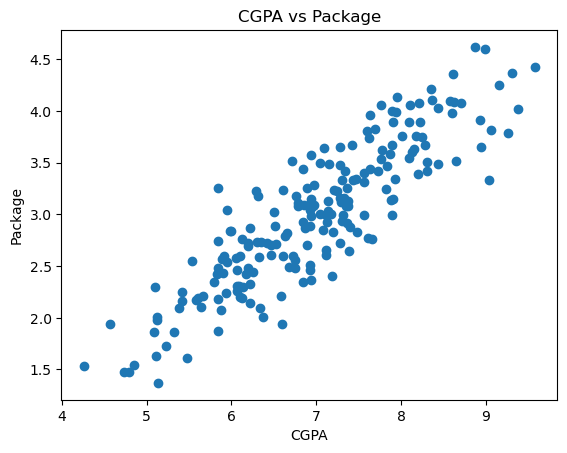

In [58]:
import matplotlib.pyplot as plt

plt.scatter(df['cgpa'], df['package'])
plt.xlabel('CGPA')
plt.ylabel('Package')
plt.title('CGPA vs Package')
plt.show()

In [44]:
from sklearn.model_selection import train_test_split
X = df['cgpa'].values  # Features
y = df['package'].values  # Target variable


In [45]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=2)

In [46]:
X_train.shape[0]

160

In [47]:
lr = LinearRegressionModel()
lr.fit(X_train, y_train)

Fitted model with slope: 0.5579519734250721, intercept: -0.8961119222429152


In [48]:
print(lr.predict(X_test[0]))

3.891116009744203


In [52]:
y_pred = lr.predict(X_test)
y_pred

array([3.89111601, 3.09324469, 2.38464568, 2.57434935, 1.6537286 ,
       1.77647803, 2.07219258, 2.93143862, 3.76278706, 2.93701814,
       4.09197872, 3.51170867, 2.97049525, 2.40138424, 3.18809652,
       3.46707251, 1.94386362, 3.24389172, 2.97607477, 3.41685683,
       2.55761079, 3.16577844, 2.85890486, 3.12114229, 3.68467378,
       2.8700639 , 3.49497011, 3.34432308, 3.91901361, 1.96060218,
       3.65119666, 3.2104146 , 3.74046898, 2.7863711 , 2.78079158,
       3.27178932, 3.52844723, 2.61340599, 2.65804215, 2.71383735])

In [ ]:
from sklearn.metrics import mean_squared_error, r2_score
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)
print(f"Mean Squared Error: {mse}")
print(f"R-squared: {r2}")


Mean Squared Error: 0.12129235313495523
R-squared: 0.7807301475103842


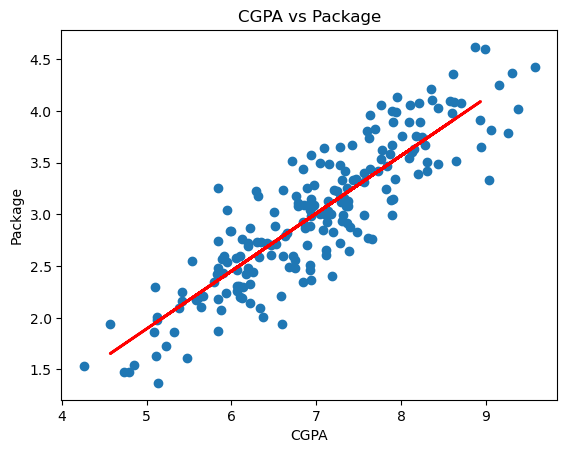

In [59]:
plt.scatter(df['cgpa'], df['package'])
plt.plot(X_test, y_pred, color='red', linewidth=2)
plt.xlabel('CGPA')
plt.ylabel('Package')
plt.title('CGPA vs Package')
plt.show()